# Analiza glavnih komponenti i klasifikacija

Analiza glavnih komponenti se može iskoristiti za redukciju dimenzionalnosti podataka sa kojima rade algoritmi mašinskog učenja. Nadalje sledi jedan takav primer klasifikacije MNIST sličica.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import mnist

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from time import time

In [5]:
np.random.seed(7)

Prvo ćemo učitati skupove podataka korišćenjem podrške Keras biblioteke.

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Podsetimo se da su MNIST sličice dimenzija 28x28 piksela u crno-belom modu.

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
image_width = 28
image_height = 28

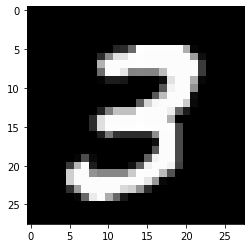

In [10]:
plt.imshow(X_train[7], cmap='gray')
plt.show()

Za treniranje modela ćemo iskoristiti samo prvih 20000 slika. 

In [11]:
number_of_images = 20000

In [12]:
X_train = X_train[:number_of_images]
y_train = y_train[:number_of_images]

Slike ćemo pre klasifikacije pripremiti za rad tako što ćemo ih *ispraviti* tj. sa 2D matrice vrednosti svesti na 1D niz vrednosti piksela, a potom i normalizovati. 

In [13]:
X_train = X_train.reshape(-1, image_width*image_height).astype('float32')
X_train /= 255.

In [14]:
X_train.shape

(20000, 784)

In [15]:
X_test = X_test.reshape(-1, image_width*image_height).astype('float32')
X_test /= 255.

In [16]:
X_test.shape

(10000, 784)

Dalje ćemo slike svesti na vektore dimenzije 30 korišćenjem analize glavnih komponenti.

In [17]:
pca = PCA(n_components=30)

In [18]:
pca.fit(X_train, y_train)

PCA(n_components=30)

In [19]:
X_train_pca = pca.transform(X_train)

In [20]:
X_train_pca.shape

(20000, 30)

In [21]:
X_test_pca = pca.transform(X_test)

In [22]:
X_test_pca.shape

(10000, 30)

Za klasifikaciju slika iskoristićemo logističku regresiju. Pošto je u pitanju višeklasna klasifikacija, postavićemo i vrednost `multi_class` parametra tako da se koristi `jedan protiv svih` tehnika. 

In [23]:
model = LogisticRegression(max_iter=400, multi_class='ovr')

In [24]:
start_time = time()
model.fit(X_train_pca, y_train)
end_time = time()

Dalje slede ocene ovog klasifikatora na skupu za treniranje i testiranje.

In [25]:
print('Vreme potrebno za treniranje modela (u sekundama): ', end_time - start_time)

Vreme potrebno za treniranje modela (u sekundama):  0.7885921001434326


In [26]:
print('Ocena modela na skupu za treniranje: ', model.score(X_train_pca, y_train))

Ocena modela na skupu za treniranje:  0.881


In [27]:
print('Ocena modela na skupu za testiranje: ', model.score(X_test_pca, y_test))

Ocena modela na skupu za testiranje:  0.8857


Ukoliko bismo isti model učili nad punim reprezentacijama vektora, dobili bismo nešto bolje rezultate, ali uz treniranje modela koje značajno duže traje.

In [28]:
model_full = LogisticRegression(max_iter=400, multi_class='ovr')

In [29]:
start_time = time()
model_full.fit(X_train, y_train)
end_time = time()

In [30]:
print('Vreme potrebno za treniranje modela (u sekundama): ', end_time - start_time)

Vreme potrebno za treniranje modela (u sekundama):  46.40218710899353


In [31]:
print('Ocena modela na skupu za treniranje: ', model_full.score(X_train, y_train))

Ocena modela na skupu za treniranje:  0.9403


In [32]:
print('Ocena modela na skupu za testiranje: ', model_full.score(X_test, y_test))

Ocena modela na skupu za testiranje:  0.911


Model koji koristi 30 atributa na test skupu ima ocenu 0.8857, dok model koji koristi svih 784 atributa ima ocenu 0.911.

<div class='alert alert-info'>
Zadaci za vežbu:

1. Koliki udeo varijanse se objašnjava izborom 30 glavnih komponenti?
2. Koliko glavnih komponenti treba odabrati da bi se objasnilo barem 85% varijanse polaznog skupa?
</div>